# Generating our Own Audio

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [2]:
output_file = 'output_generated.wav'

In [3]:
duration = 3  # seconds
sampling_freq = 44100  # Hz
tone_freq = 587
min_val = -2 * np.pi
max_val = 2 * np.pi

In [4]:
t = np.linspace(min_val, max_val, duration * sampling_freq)
audio = np.sin(2 * np.pi * tone_freq * t)

In [5]:
noise = 0.4 * np.random.rand(duration * sampling_freq)
audio += noise

In [6]:
noise

array([0.20132199, 0.00078494, 0.21311038, ..., 0.13952107, 0.12675292,
       0.1859898 ])

In [7]:
audio

array([-0.79061478, -0.88740736, -0.46344193, ...,  0.81607338,
        1.01494521,  1.17792658])

In [8]:
scaling_factor = pow(2,15) - 1
audio_normalized = audio / np.max(np.abs(audio))
audio_scaled = np.int16(audio_normalized * scaling_factor)

In [9]:
write(output_file, sampling_freq, audio_scaled)

In [10]:
audio = audio[:100]

In [11]:
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000

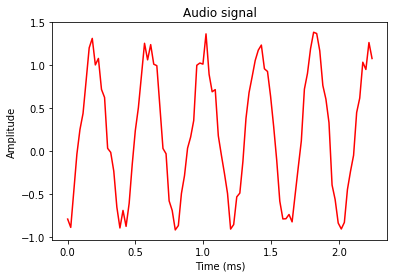

In [13]:
%matplotlib inline
plt.plot(x_values, audio, color='red')

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()
